From `analysis_notebooks/R68_MCMC_paper_plots.ipynb`

In [1]:
#Import libraries and settings
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
exec(open("../analysis_notebooks/nb_setup.py").read())#Is there a better way to do this?
from constants import *
import R68_spec_tools as spec
import R68_yield as Yield
from tqdm.notebook import tqdm
from matplotlib.pyplot import *
style.use('../mplstyles/stylelib/standard.mplstyle')
import R68_plot_tools as pt
import matplotlib.patches as mpatches
import pickle as pkl
from scipy.optimize import fsolve
from scipy.special import erf
import R68_plot_tools as pt

fig_w=9

plot_fill_colors=['g','g']
plot_alphas=[1,0.5]
plot_zorders=[2,1,0]
plot_labels=['This work: Stat','Stat+Syst']#,'+BurstSyst']

../mplstyles


In /home/gerudo7/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/gerudo7/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/gerudo7/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/gerudo7/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/gerudo7/.local/lib/python3.6/site-packages/matplotlib/mpl-d

3.3.1
/mnt/d/git/R68_paper2019/mplstyles
dict_keys(['xx', 'yy', 'ex', 'ey'])


In [2]:
#Function Definitions

#Turns out we need the helper functions to still be defined since the stored samplers rely on them.
#Don't think it matters if they're exactly the same as what was used, since we don't use them here.
def Fit_helper(theta):
    return calc_log_prob(model='Sor', theta=theta, theta_bounds=((0,1),(0,3e-2),(0,10),(0,5)),
                         spec_bounds=(5,101), likelihood='Pois')

def ERtoNR(ER,Y,V,eps):
    func = lambda NR : NR-ER*(1+V/eps)/(1+Y.calc(NR)*V/eps)
    NR_guess = ER
    return fsolve(func, NR_guess)

def NRtoER(NR,Y,V,eps):
    return NR*(1+Y.calc(NR)*V/eps)/(1+V/eps)

In [3]:
#First run Lindhard

model_label='Lindhard'
fnames=['data/mcmc_Lind_128walk_50kstep_SNorm_v1.pkl',
        'data/mcmc_Lind_128walk_50kstep_SNorm_v2.pkl']

mcmc_datas=[]
for fname in fnames:
    with open(fname,'rb') as file:
        mcmc_datas.append(pkl.load(file))
RQss=[]
for datai in mcmc_datas:
    RQss.append(datai['RQs'])

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


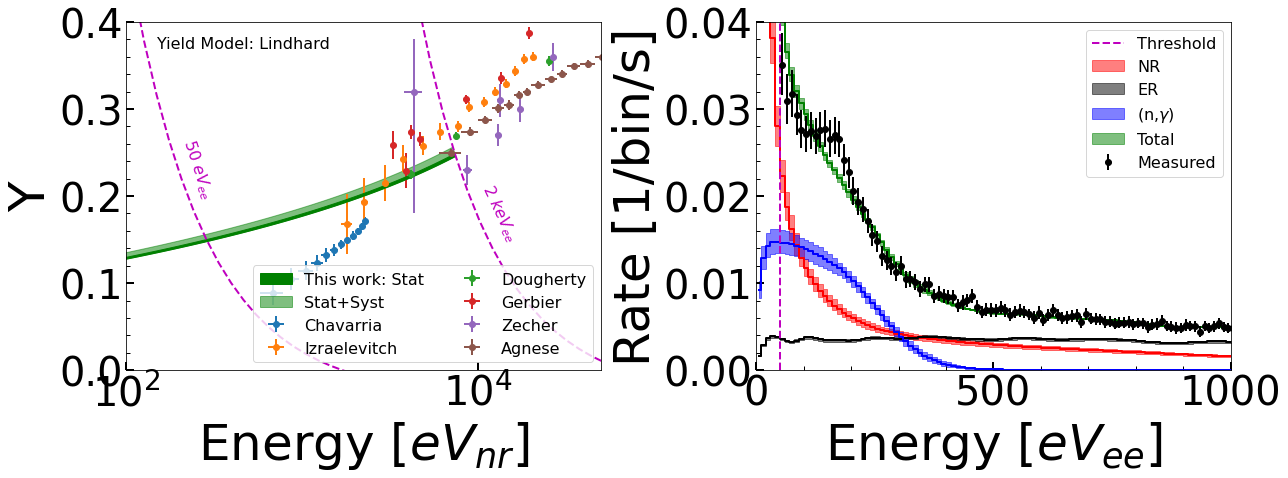

In [4]:
fig,axs=subplots(1,2,figsize=(2*fig_w, fig_w*(.75)))

#Add other measurements from lit
pt.plotOldYs(axs[0],datasets=['chav','izr','dough','gerb','zech','agnese'],
             labels=['Chavarria','Izraelevitch','Dougherty','Gerbier','Zecher','Agnese'],
             fmt='o',markersize=6)

axs[0].text(1.5e2,0.37,'Yield Model: '+model_label,size=16)

for i,RQi in enumerate(RQss):
    Er_Ycalc_plot=np.concatenate((RQi['Er_Ycalc'][0][:1],RQi['Er_Ycalc'][1],RQi['Er_Ycalc'][0][-1:],RQi['Er_Ycalc'][2][::-1]))
    Ydist_plot=np.concatenate((RQi['Ydist'][0][:1],RQi['Ydist'][1],RQi['Ydist'][0][-1:],RQi['Ydist'][2][::-1]))

    axs[0].fill(Er_Ycalc_plot,Ydist_plot,color=plot_fill_colors[i],zorder=plot_zorders[i], alpha=plot_alphas[i], label=plot_labels[i])



Ebins=mcmc_datas[1]['Ebins']
Ebin_ctr=(Ebins[:-1]+Ebins[1:])/2

axs[1].errorbar(Ebin_ctr[Ebin_ctr>50],RQss[1]['N_meas'][Ebin_ctr>50],(RQss[1]['dN_meas'].T[Ebin_ctr>50]).T,
                ecolor='k', marker='o',markersize=6,color='k', linestyle='none',label='Measured',zorder=5)

axs[0].set_prop_cycle(None)#Reset color cycle
axs[1].set_prop_cycle(None)

axs[1].step(Ebin_ctr,RQss[1]['N_nr_plot'][0],color='r',where='mid')
axs[1].step(Ebin_ctr,RQss[1]['N_er_plot'][0],color='k',where='mid')
axs[1].step(Ebin_ctr,RQss[1]['N_ng_plot'][0],color='b',where='mid')
axs[1].step(Ebin_ctr,RQss[1]['N_tot_plot'][0],color='g',where='mid')

axs[1].fill_between(Ebin_ctr,RQss[1]['N_nr_plot'][1],RQss[1]['N_nr_plot'][2],color='r',alpha=0.5,step='mid',label='NR')
axs[1].fill_between(Ebin_ctr,RQss[1]['N_er_plot'][1],RQss[1]['N_er_plot'][2],color='k',alpha=0.5,step='mid',label='ER')
axs[1].fill_between(Ebin_ctr,RQss[1]['N_ng_plot'][1],RQss[1]['N_ng_plot'][2],color='b',alpha=0.5,step='mid',label=r'(n,$\gamma)$')
axs[1].fill_between(Ebin_ctr,RQss[1]['N_tot_plot'][1],RQss[1]['N_tot_plot'][2],color='g',alpha=0.5,step='mid',label='Total')

#Analysis Range
axs[1].axvline(50,linestyle='--',color='m',label='Threshold')

Yiso = lambda Enr,Eee: Eee/Enr*(1+eps/V)-eps/V
axs[0].plot(np.logspace(-2,5,100),Yiso(np.logspace(-2,5,100),50),'--m')
axs[0].plot(np.logspace(-2,5,100),Yiso(np.logspace(-2,5,100),2e3),'--m')

axs[0].text(2e2,0.2,r'50 $eV_{ee}$',size=16,color='m',rotation=-72)
axs[0].text(1e4,0.15,r'2 $keV_{ee}$',size=16,color='m',rotation=-65)

#Axes
axs[0].set_xlim(1e2,5e4);
axs[0].set_xscale('log')
axs[0].set_ylim(0,0.4)
axs[0].yaxis.set_major_locator(plt.MultipleLocator(0.1))
axs[0].set_xlabel(r'Energy [$eV_{nr}$]')
axs[0].set_ylabel('Y')
axs[0].legend(loc='lower right',ncol=2,prop={'size': 16})

axs[1].set_ylim(0,0.04)
axs[1].yaxis.set_major_locator(plt.MultipleLocator(0.01))
axs[1].set_xlim(0,1e3)
axs[1].set_xlabel(r'Energy [$eV_{ee}$]')
axs[1].set_ylabel('Rate [1/bin/s]')

axs[1].legend(loc='upper right', prop={'size': 16})

fig.align_labels()

tight_layout()

plt.savefig("../figures/mcmc_Y_and_spec_lind.pdf")
plt.show()

In [5]:
#Now run Sorensen

model_label='Sorensen'
fnames=['data/mcmc_Sor_128walk_50kstep_SNorm_v3.pkl',
        'data/mcmc_Sor_128walk_50kstep_SNorm_v4.pkl']

mcmc_datas=[]
for fname in fnames:
    with open(fname,'rb') as file:
        mcmc_datas.append(pkl.load(file))
RQss=[]
for datai in mcmc_datas:
    RQss.append(datai['RQs'])

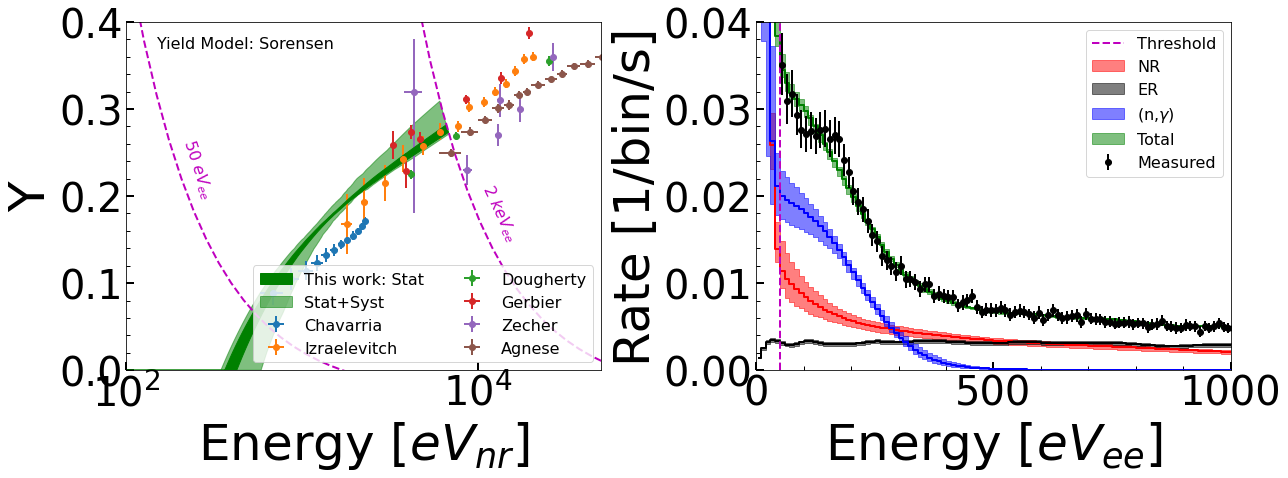

In [6]:
fig,axs=subplots(1,2,figsize=(2*fig_w, fig_w*(.75)))

#Add other measurements from lit
pt.plotOldYs(axs[0],datasets=['chav','izr','dough','gerb','zech','agnese'],
             labels=['Chavarria','Izraelevitch','Dougherty','Gerbier','Zecher','Agnese'],
             fmt='o',markersize=6)

axs[0].text(1.5e2,0.37,'Yield Model: '+model_label,size=16)

for i,RQi in enumerate(RQss):
    Er_Ycalc_plot=np.concatenate((RQi['Er_Ycalc'][0][:1],RQi['Er_Ycalc'][1],RQi['Er_Ycalc'][0][-1:],RQi['Er_Ycalc'][2][::-1]))
    Ydist_plot=np.concatenate((RQi['Ydist'][0][:1],RQi['Ydist'][1],RQi['Ydist'][0][-1:],RQi['Ydist'][2][::-1]))

    axs[0].fill(Er_Ycalc_plot,Ydist_plot,color=plot_fill_colors[i],zorder=plot_zorders[i], alpha=plot_alphas[i], label=plot_labels[i])



Ebins=mcmc_datas[1]['Ebins']
Ebin_ctr=(Ebins[:-1]+Ebins[1:])/2

axs[1].errorbar(Ebin_ctr[Ebin_ctr>50],RQss[1]['N_meas'][Ebin_ctr>50],(RQss[1]['dN_meas'].T[Ebin_ctr>50]).T,
                ecolor='k', marker='o',markersize=6,color='k', linestyle='none',label='Measured',zorder=5)

axs[0].set_prop_cycle(None)#Reset color cycle
axs[1].set_prop_cycle(None)

axs[1].step(Ebin_ctr,RQss[1]['N_nr_plot'][0],color='r',where='mid')
axs[1].step(Ebin_ctr,RQss[1]['N_er_plot'][0],color='k',where='mid')
axs[1].step(Ebin_ctr,RQss[1]['N_ng_plot'][0],color='b',where='mid')
axs[1].step(Ebin_ctr,RQss[1]['N_tot_plot'][0],color='g',where='mid')

axs[1].fill_between(Ebin_ctr,RQss[1]['N_nr_plot'][1],RQss[1]['N_nr_plot'][2],color='r',alpha=0.5,step='mid',label='NR')
axs[1].fill_between(Ebin_ctr,RQss[1]['N_er_plot'][1],RQss[1]['N_er_plot'][2],color='k',alpha=0.5,step='mid',label='ER')
axs[1].fill_between(Ebin_ctr,RQss[1]['N_ng_plot'][1],RQss[1]['N_ng_plot'][2],color='b',alpha=0.5,step='mid',label=r'(n,$\gamma)$')
axs[1].fill_between(Ebin_ctr,RQss[1]['N_tot_plot'][1],RQss[1]['N_tot_plot'][2],color='g',alpha=0.5,step='mid',label='Total')

#Analysis Range
axs[1].axvline(50,linestyle='--',color='m',label='Threshold')

Yiso = lambda Enr,Eee: Eee/Enr*(1+eps/V)-eps/V
axs[0].plot(np.logspace(-2,5,100),Yiso(np.logspace(-2,5,100),50),'--m')
axs[0].plot(np.logspace(-2,5,100),Yiso(np.logspace(-2,5,100),2e3),'--m')

axs[0].text(2e2,0.2,r'50 $eV_{ee}$',size=16,color='m',rotation=-72)
axs[0].text(1e4,0.15,r'2 $keV_{ee}$',size=16,color='m',rotation=-65)

#Axes
axs[0].set_xlim(1e2,5e4);
axs[0].set_xscale('log')
axs[0].set_ylim(0,0.4)
axs[0].yaxis.set_major_locator(plt.MultipleLocator(0.1))
axs[0].set_xlabel(r'Energy [$eV_{nr}$]')
axs[0].set_ylabel('Y')
axs[0].legend(loc='lower right',ncol=2,prop={'size': 16})

axs[1].set_ylim(0,0.04)
axs[1].yaxis.set_major_locator(plt.MultipleLocator(0.01))
axs[1].set_xlim(0,1e3)
axs[1].set_xlabel(r'Energy [$eV_{ee}$]')
axs[1].set_ylabel('Rate [1/bin/s]')

axs[1].legend(loc='upper right', prop={'size': 16})

fig.align_labels()

tight_layout()

plt.savefig("../figures/mcmc_Y_and_spec_sor.pdf")
plt.show()